<a href="https://colab.research.google.com/github/Anisafi/uas_datmin/blob/main/NaiveBayesDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Hubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# 2. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, log_loss
)


In [17]:
# 3. Load Dataset dan Persiapan Data
file_path = '/content/drive/MyDrive/DM/winequality-red.csv'
df = pd.read_csv(file_path, sep=';') #(preprocessing)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# 4. Preprocessing: Ubah Target Menjadi Biner
# Ubah nilai 'quality' menjadi binary:
# Quality > 6.5 → 1 (Good), sisanya → 0 (Bad)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# Cek distribusi
df['quality'].value_counts()


,count
quality,
0,1382
1,217


In [19]:
# 5. Pisahkan Fitur dan Label
X = df.drop('quality', axis=1)
y = df['quality']


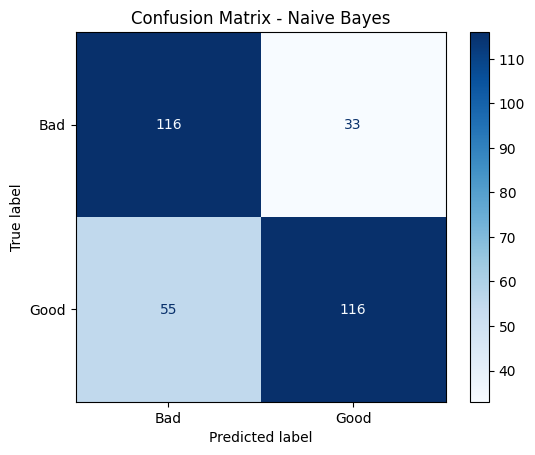

In [ ]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# 7. Buat dan Latih Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

Akurasi Training: 73.1 %
Akurasi Testing : 72.5 %
Log Loss: 0.7712


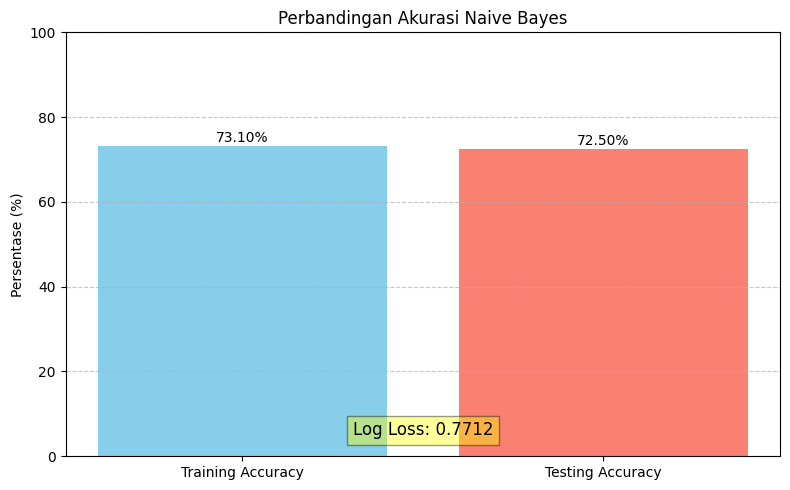

In [22]:
# 8. Evaluasi Model – Akurasi & Log Loss
# 8. Evaluasi Model – Akurasi & Log Loss dengan Grafik
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Prediksi
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Akurasi
acc_train = nb_model.score(X_train, y_train)
acc_test = accuracy_score(y_test, y_pred_nb)

# Log Loss
loss = log_loss(y_test, y_prob_nb)

# Tampilkan nilai di terminal
print("Akurasi Training:", round(acc_train * 100, 2), "%")
print("Akurasi Testing :", round(acc_test * 100, 2), "%")
print("Log Loss:", round(loss, 4))

# Visualisasi Grafik Akurasi
labels = ['Training Accuracy', 'Testing Accuracy']
values = [acc_train * 100, acc_test * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Perbandingan Akurasi Naive Bayes')
plt.ylim(0, 100)
plt.ylabel('Persentase (%)')

# Tampilkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f'{yval:.2f}%', ha='center', fontsize=10)

# Tambahkan log loss sebagai teks
plt.text(0.5, 5, f'Log Loss: {loss:.4f}', ha='center', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.4))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


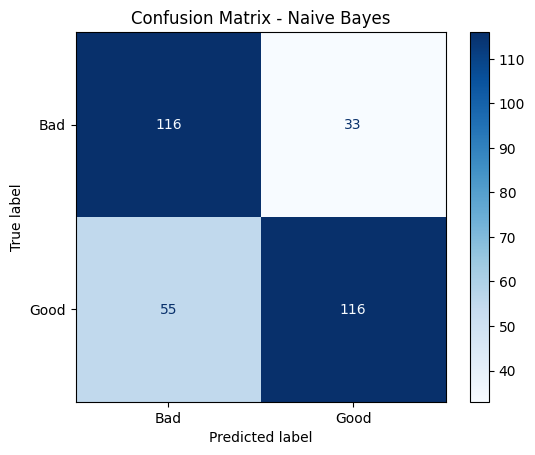


 Classification Report:
              precision    recall  f1-score   support

         Bad       0.68      0.78      0.72       149
        Good       0.78      0.68      0.72       171

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.73      0.72      0.72       320



In [23]:
# 9. Confusion Matrix & Classification Report
ConfusionMatrixDisplay.from_estimator(
    nb_model, X_test, y_test,
    display_labels=["Bad", "Good"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Laporan klasifikasi
print("\n Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Bad", "Good"]))


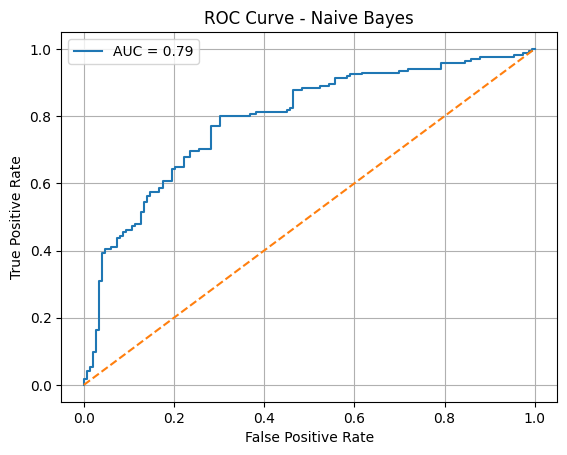

🔹 AUC Score: 0.7909


In [24]:
# 10. ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print("🔹 AUC Score:", round(roc_auc, 4))


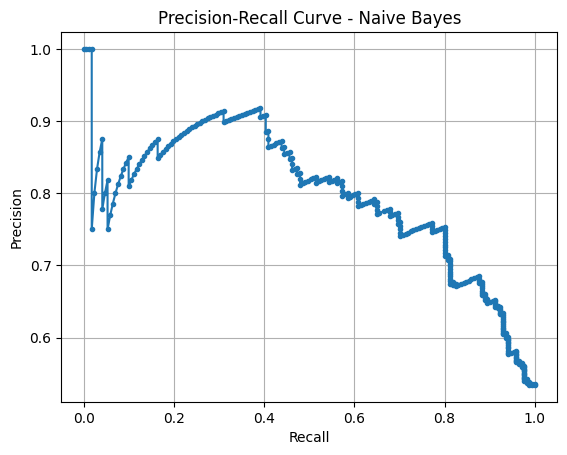

In [25]:
# 11. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_nb)

plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


/tmp/ipython-input-26-2345585067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_nb, palette="pastel")


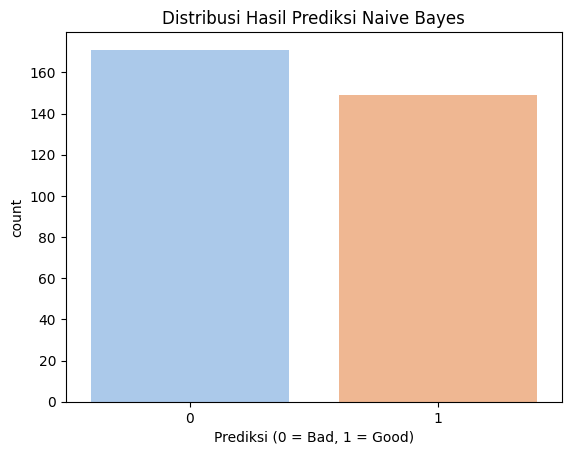

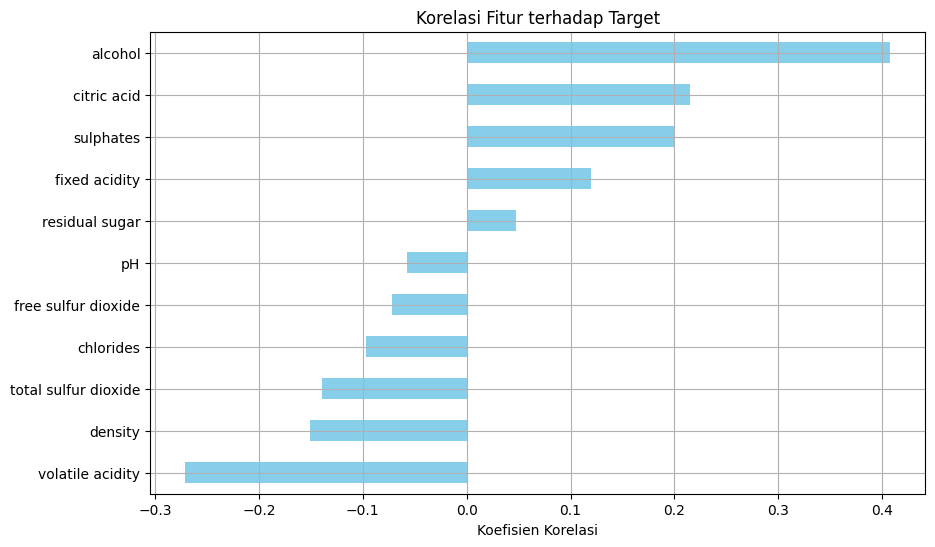

In [26]:
# 11. Visualisasi Tambahan: Countplot & Korelasi
# Visualisasi hasil prediksi
sns.countplot(x=y_pred_nb, palette="pastel")
plt.title("Distribusi Hasil Prediksi Naive Bayes")
plt.xlabel("Prediksi (0 = Bad, 1 = Good)")
plt.show()

# Korelasi fitur terhadap kualitas
plt.figure(figsize=(10,6))
corr = df.drop('quality', axis=1).corrwith(df['quality'])
corr.sort_values().plot(kind='barh', color='skyblue')
plt.title('Korelasi Fitur terhadap Target')
plt.xlabel('Koefisien Korelasi')
plt.grid(True)
plt.show()


In [27]:
# 13. Contoh Tabel Perbandingan Prediksi
comparison_df = pd.DataFrame({
    'Fakta': y_test.values,
    'Prediksi': y_pred_nb
})
print("Contoh Prediksi vs Fakta:")
print(comparison_df.sample(10))


Contoh Prediksi vs Fakta:
     Fakta  Prediksi
271      1         0
248      0         1
9        1         1
213      1         0
143      0         0
208      1         1
47       1         0
165      1         1
2        0         0
126      1         1
